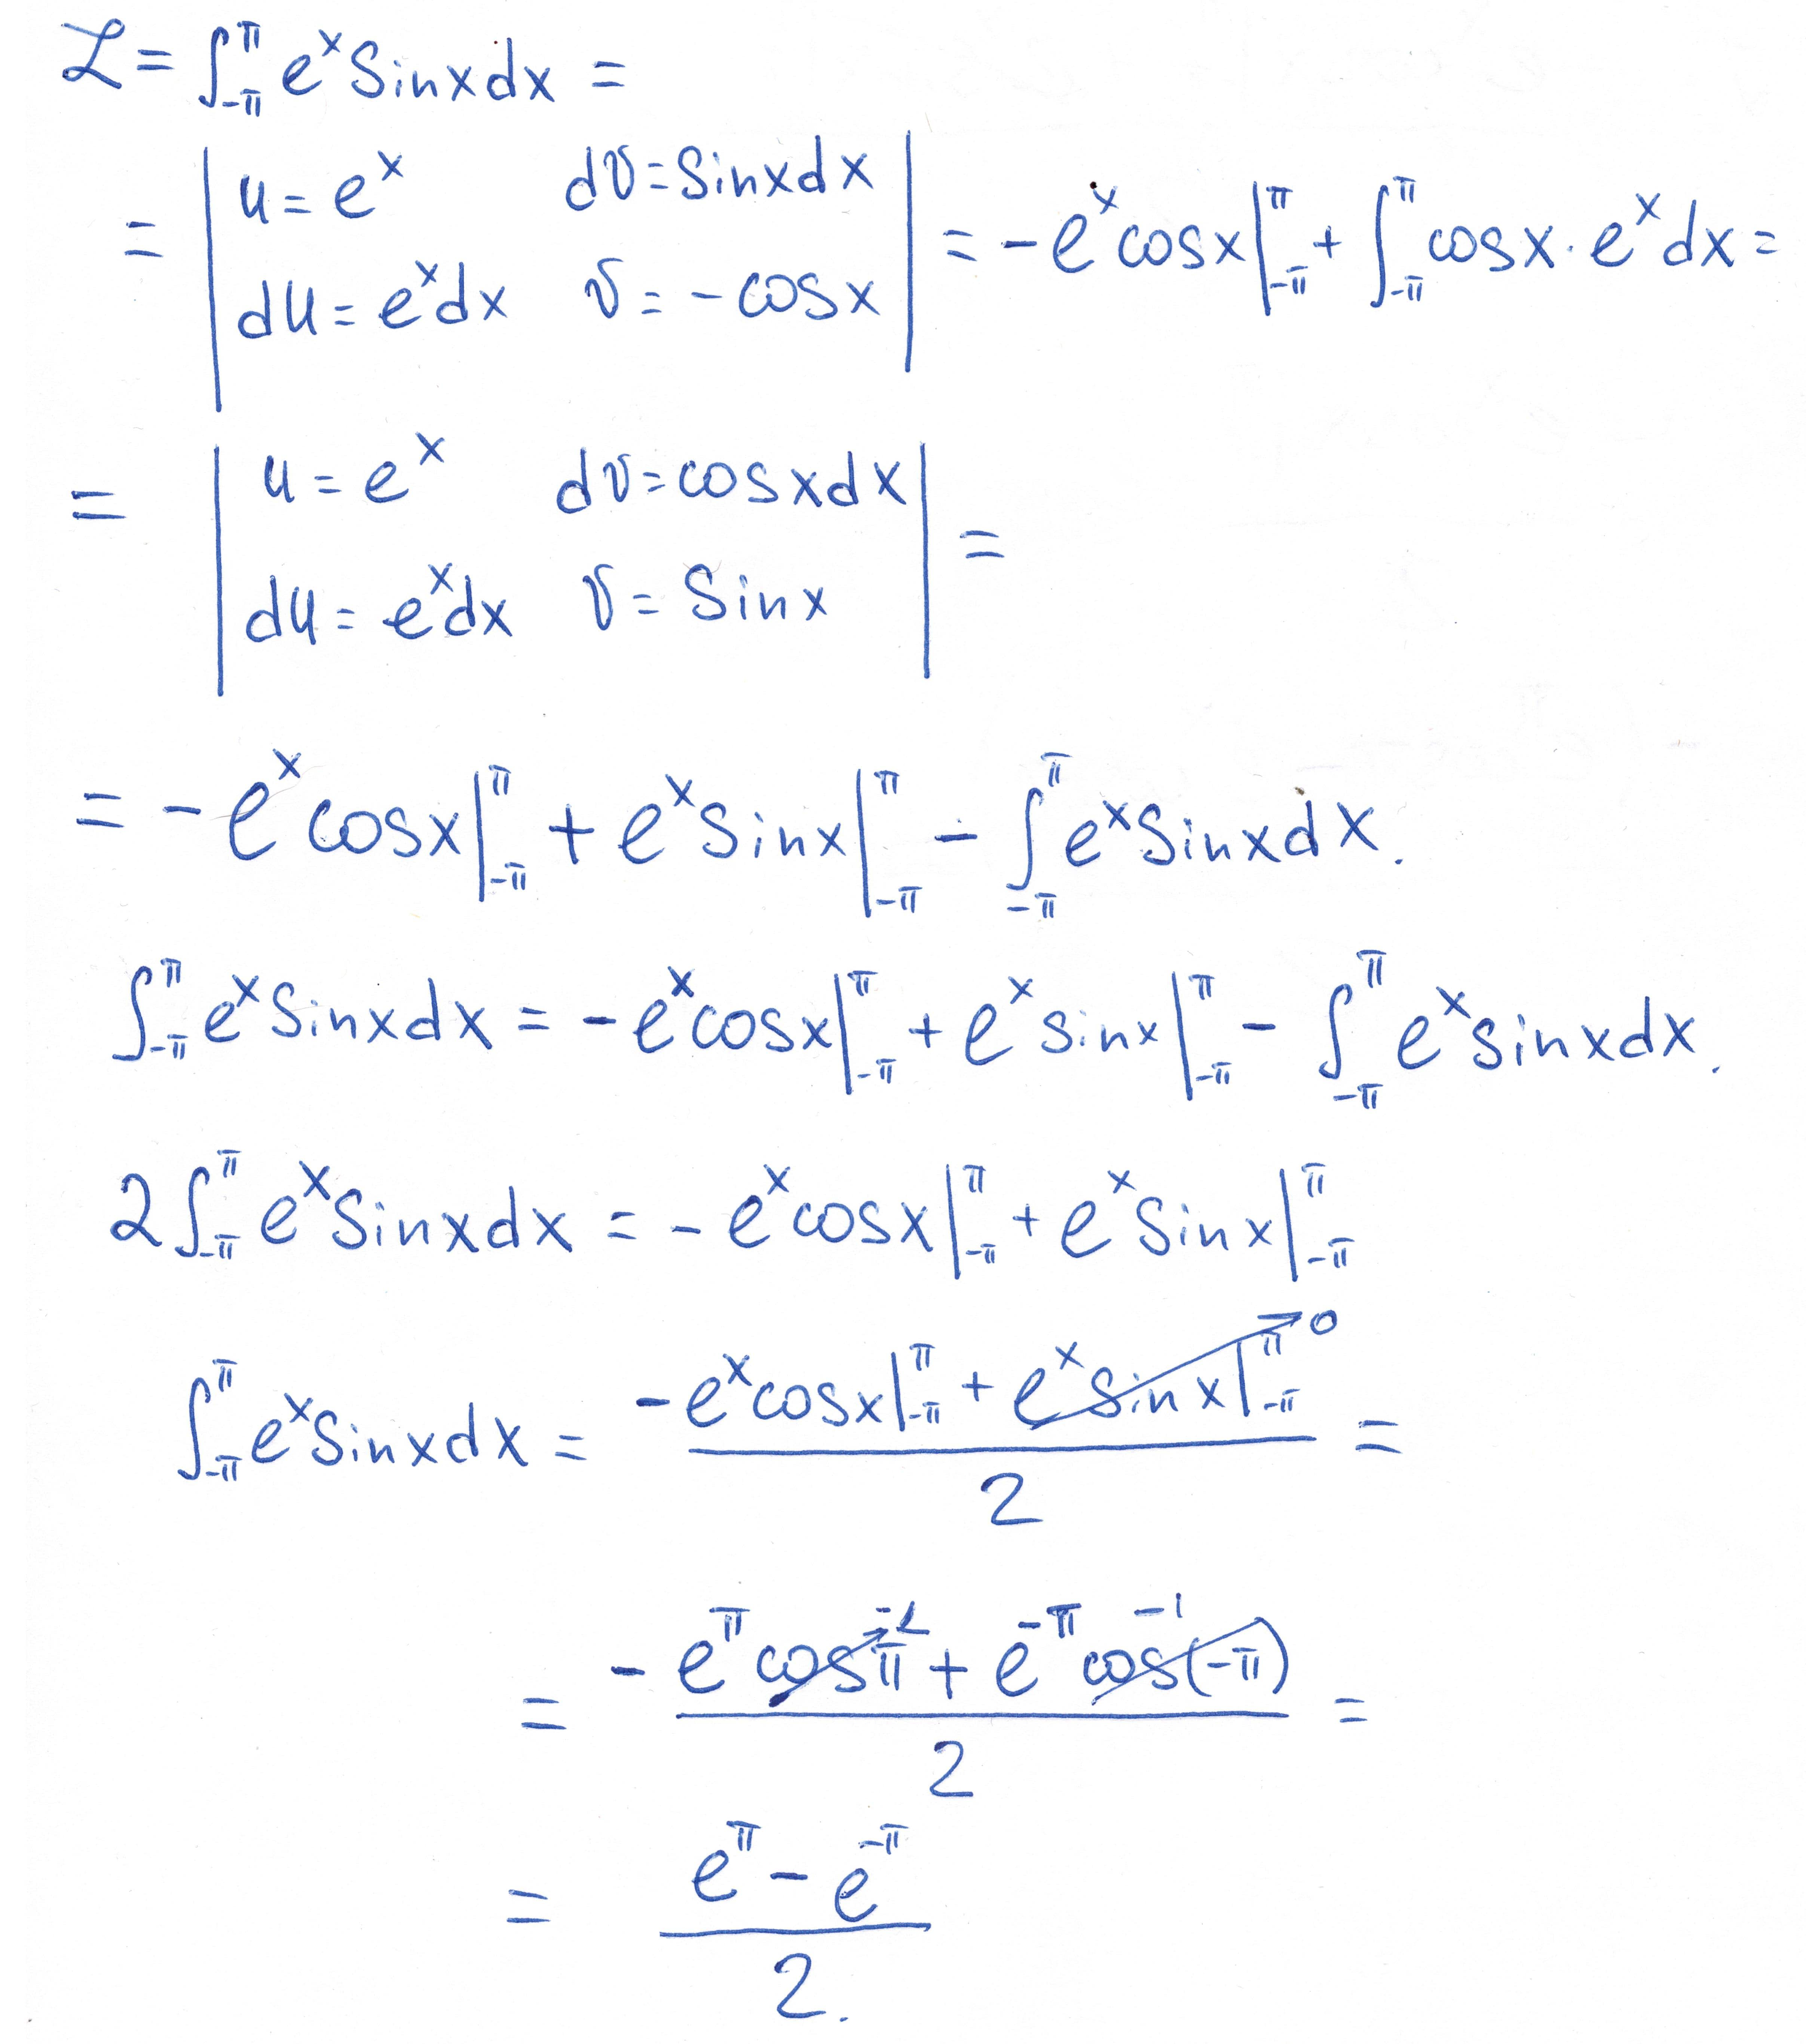

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

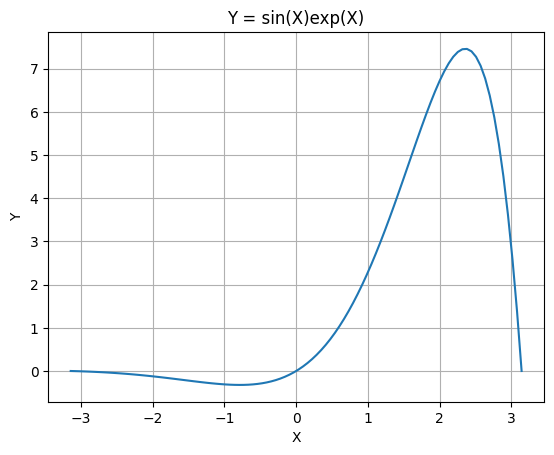

In [ ]:
x = np.linspace(-np.pi, np.pi, 100) # interval [-pi;pi] with 100 samples
y = np.sin(x)*np.exp(x) # our function

plt.style.use('default')
plt.title("Y = sin(X)exp(X)")
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.plot(x,y);

In [ ]:
def get_integral_(n_samples ,x_start =-np.pi, x_end = np.pi):
    '''Calculates integral using Trapezoidal rule'''

    #creating x samples
    X = np.linspace(x_start, x_end, n_samples)
    # calculating y samples
    Y = np.sin(X)*np.exp(X)
    #step 
    h = X[1]-X[0]

    sum = 0
    
    for x in range(len(Y)-1):
        sum = sum + (Y[x]+Y[x+1])*h/2

    error = (np.exp(np.pi)-np.exp(-np.pi))/2 - sum 

    return sum, error


In [ ]:
def get_integral(n_samples ,x_start =-np.pi, x_end = np.pi):

    X = np.linspace(x_start, x_end, n_samples)
    Y = np.sin(X)*np.exp(X)
    
    sum = np.trapz(x = X, y = Y)
    error = (np.exp(np.pi)-np.exp(-np.pi))/2 - sum 

    return sum, error


In [ ]:
import timeit

In [ ]:
%timeit get_integral(10000)

1000 loops, best of 3: 476 µs per loop


In [ ]:
%timeit get_integral_(10000)

100 loops, best of 3: 9.52 ms per loop


In [ ]:
integral , error = get_integral(10000000)
print('integral = ', integral,'error = ',error)

integral =  11.548739358150922 error =  -8.931735351325187e-10


In [ ]:
!pip install mpi4py 

     |████████████████████████████████| 1.4MB 21.8MB/s 
  Created wheel for mpi4py: filename=mpi4py-3.0.3-cp36-cp36m-linux_x86_64.whl size=2074497 sha256=32b923370f74726e306ff6e79ec9d4e5ddb789f3662d2d3ea296f64f067af539
  Stored in directory: /root/.cache/pip/wheels/18/e0/86/2b713dd512199096012ceca61429e12b960888de59818871d6
Successfully built mpi4py


In [ ]:
%%writefile integral.py

from mpi4py import MPI
import math
import numpy as np


def get_integral_in_parallel(n_samples, n_processors, rank , x_start =-np.pi, x_end = np.pi):

    #split all samples for processes
    samples_in_process = n_samples // n_processors
    #we can have some modulo after dividing
    last_samples = n_samples % n_processors
    
    #length of the interval where we calculate integral
    full_length = x_end - x_start
    #length of parts that will be calculated by processes
    part_length = full_length // n_processors

    #if the process is last
    if rank == n_processors - 1:
        #it have to calculate part of data with modulo
        X = np.linspace(x_start + rank*part_length , x_end , samples_in_process + last_samples)
    else:
        #other procesess will calculatate the same parts
        X = np.linspace(x_start + rank*part_length , x_start + (rank+1)*part_length, samples_in_process)

    #calculate samples
    Y = np.sin(X)*np.exp(X)

    #calculate integral
    sum = np.trapz(x= X, y= Y)

    return sum

def get_error(sum):
    return (np.exp(np.pi)-np.exp(-np.pi))/2 - sum


#creating mpi communicator
comm = MPI.COMM_WORLD
#getting numper of processes
n_processors = comm.Get_size()
#getting current process
rank = comm.Get_rank()

#if it's the root process
if rank ==0:
    #calculate time of running the program
    print('Number of processors = ', n_processors)
    t_start = MPI.Wtime()

#do calculations
integral = get_integral_in_parallel(70000000,n_processors, rank)
#sum results
integral = comm.reduce(integral, op = MPI.SUM, root = 0)


if rank ==0:
    #calculate time of running the program
    
    print('Result = ', integral)
    time = np.round(MPI.Wtime() - t_start, 4)
    print(time, 'Sec')
    #save it to file
    np.savez('MPI_PYTHON_'+str(n_processors), time, integral)


Writing integral.py


In [ ]:
!mpiexec -n 1 python integral.py
!mpiexec -n 2 python integral.py
!mpiexec -n 3 python integral.py
!mpiexec -n 4 python integral.py
!mpiexec -n 5 python integral.py
!mpiexec -n 6 python integral.py
!mpiexec -n 7 python integral.py
!mpiexec -n 8 python integral.py
!mpiexec -n 9 python integral.py
!mpiexec -n 10 python integral.py

Number of processors =  1
Result =  11.548739357257736
1.8677 Sec
Number of processors =  2
Result =  11.548739357257748
1.0802 Sec
Number of processors =  3
Result =  11.548739357257725
0.985 Sec
Number of processors =  4
Result =  11.548739357257672
0.9205 Sec
Number of processors =  5
Result =  11.548739357257686
0.899 Sec
Number of processors =  6
Result =  11.548739357257727
0.9838 Sec
Number of processors =  7
Result =  11.548739357256988
0.9283 Sec
Number of processors =  8
Result =  11.548739357256762
1.0028 Sec
Number of processors =  9
Result =  11.548739357256485
0.8616 Sec
Number of processors =  10
Result =  11.548739357256194
0.7516 Sec


In [ ]:
!mpirun --allow-run-as-root -n 1 python integral.py
!mpirun --allow-run-as-root -n 2 python integral.py
!mpirun --allow-run-as-root -n 3 python integral.py
!mpirun --allow-run-as-root -n 4 python integral.py
!mpirun --allow-run-as-root -n 5 python integral.py
!mpirun --allow-run-as-root -n 6 python integral.py
!mpirun --allow-run-as-root -n 7 python integral.py
!mpirun --allow-run-as-root -n 8 python integral.py
!mpirun --allow-run-as-root -n 9 python integral.py
!mpirun --allow-run-as-root -n 10 python integral.py

Number of processors =  1
Result =  11.548739357257736
3.5091 Sec
Number of processors =  2
Result =  11.548739357257748
2.8159 Sec
Number of processors =  3
Result =  11.548739357257727
2.9179 Sec
Number of processors =  4
Result =  11.548739357257672
3.0762 Sec
Number of processors =  5
Result =  11.548739357257686
2.9092 Sec
Number of processors =  6
Result =  11.548739357257727
2.9382 Sec
Number of processors =  7
Result =  11.548739357256988
12.3511 Sec
Number of processors =  8
Result =  11.548739357256762
12.3513 Sec
Number of processors =  9
Result =  11.548739357256485
12.3762 Sec
Number of processors =  10
Result =  11.548739357256196
12.3501 Sec


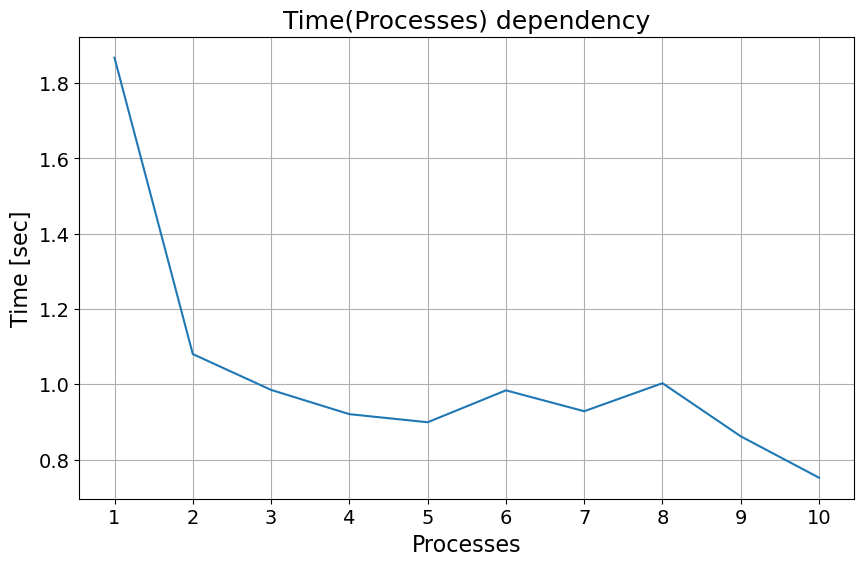

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

a = []
b = []
for i in range(1, 11, 1):
    ex = np.load('MPI_PYTHON_'+str(i)+'.npz')
    a.append((ex['arr_0']))
    b.append(1/(ex['arr_0']))
    
plt.style.use('default')
plt.figure(figsize=(10, 6))
plt.title('Time(Processes) dependency', fontsize=18)
plt.ylabel('Time [sec]', fontsize=16)
plt.xlabel('Processes', fontsize=16)
plt.xticks(np.arange(0, 11), np.arange(1, 12), fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.plot(np.arange(10),a);

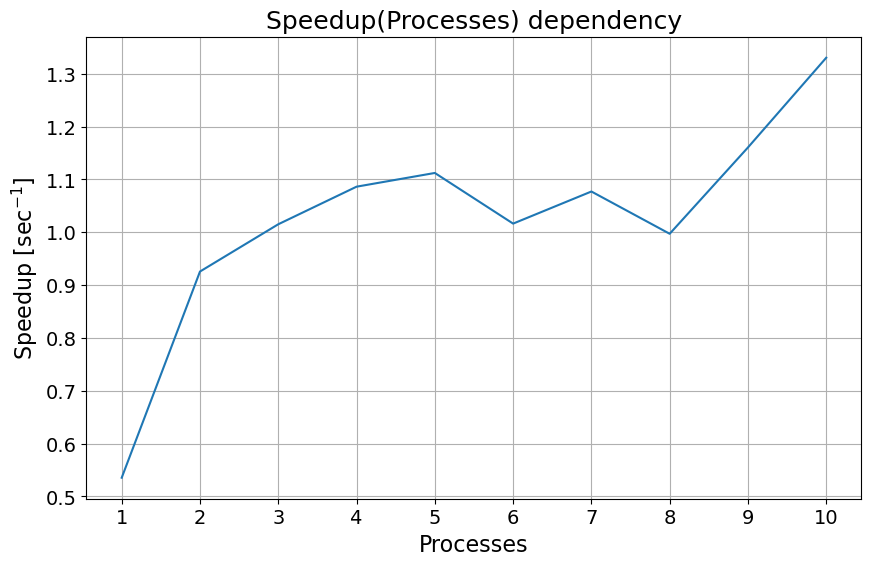

In [ ]:
plt.style.use('default')
plt.figure(figsize=(10, 6))
plt.title('Speedup(Processes) dependency', fontsize=18)
plt.ylabel('Speedup [sec$^{-1}$]', fontsize=16)
plt.xlabel('Processes', fontsize=16)
plt.xticks(np.arange(0, 11), np.arange(1, 12), fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.plot(np.arange(10),b);

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


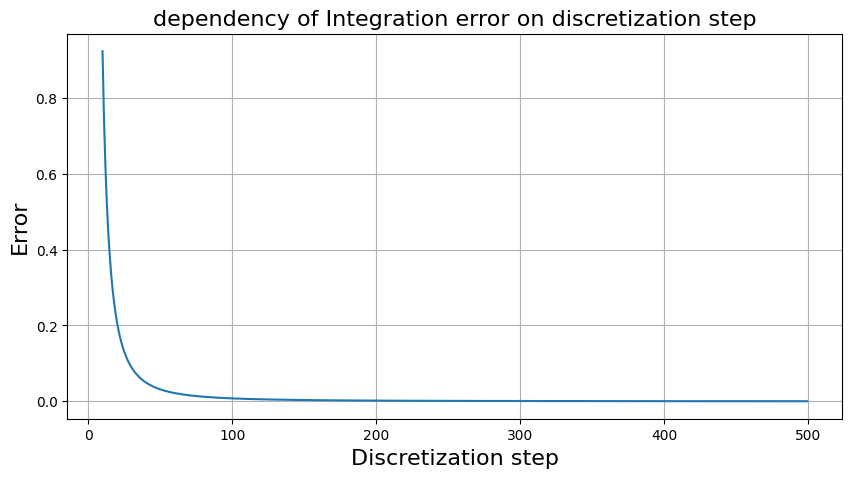

In [ ]:
start = 10
end = 500
errors = np.empty(end-start)

for i in range(start,end):
    _,errors[i-start] = get_integral(i)

plt.figure(figsize=(10, 5))
plt.style.use('default')
plt.title('dependency of Integration error on discretization step', fontsize=16)
plt.ylabel('Error', fontsize=16)
plt.xlabel('Discretization step', fontsize=16)
plt.grid()
plt.plot(np.arange(start,end),errors);

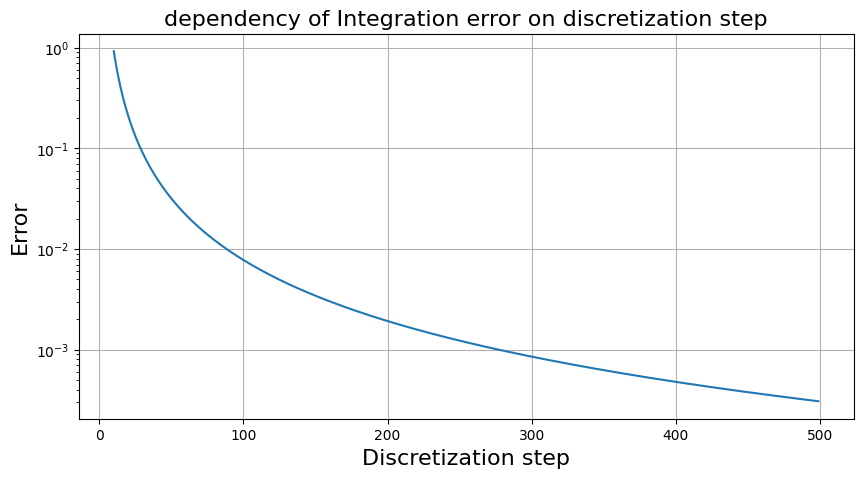

In [ ]:
plt.figure(figsize=(10, 5))
plt.title('dependency of Integration error on discretization step', fontsize=16)
plt.ylabel('Error', fontsize=16)
plt.xlabel('Discretization step', fontsize=16)
plt.grid()
plt.plot(np.arange(start,end),errors);
plt.yscale(value='log')
#plt.xscale(value='log')